In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../../data/National_education_cost/CP1.csv")
import warnings
warnings.filterwarnings("ignore")

df.head()

,Unnamed: 0,Public Two-Year,Public Four-Year,Private Nonprofit Four-Year
0,86-87,640.0,1260.0,5520.0
1,87-88,720.0,1420.0,5930.0
2,88-89,800.0,1520.0,6760.0
3,89-90,850.0,1640.0,7090.0
4,90-91,950.0,1800.0,7790.0


In [2]:
df.rename({"Unnamed: 0": "Year"}, axis=1, inplace=True)

In [3]:
df.dtypes

Year                            object
Public Two-Year                float64
Public Four-Year               float64
Private Nonprofit Four-Year    float64
dtype: object

In [4]:
# df.drop("Unnamed: 4", axis=1, inplace=True)

In [5]:
df.dtypes

Year                            object
Public Two-Year                float64
Public Four-Year               float64
Private Nonprofit Four-Year    float64
dtype: object

In [6]:
def replace_year(x):
    current = x[:2]
    if current[0] in ["8","9"]: return "19"+current
    else: return "20"+current
df['Year'] = df['Year'].apply(replace_year)

In [7]:
df['Year'] = pd.to_datetime(df['Year']).dt.year

In [8]:
df.head()

,Year,Public Two-Year,Public Four-Year,Private Nonprofit Four-Year
0,1986,640.0,1260.0,5520.0
1,1987,720.0,1420.0,5930.0
2,1988,800.0,1520.0,6760.0
3,1989,850.0,1640.0,7090.0
4,1990,950.0,1800.0,7790.0


In [9]:
df.isna().sum()

Year                           0
Public Two-Year                0
Public Four-Year               0
Private Nonprofit Four-Year    0
dtype: int64

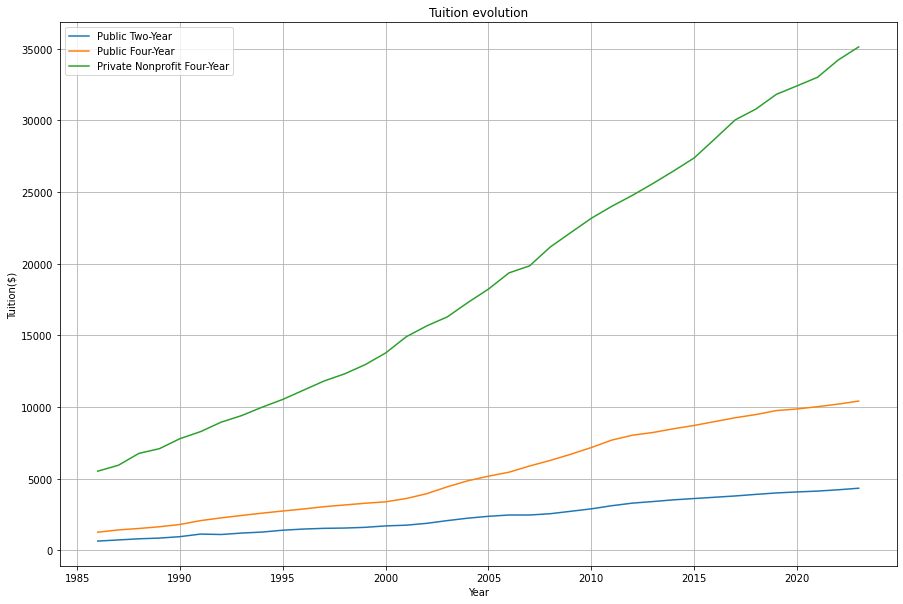

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
for columns in df.columns.to_list()[1:]:   
    sns.lineplot(data=df, x="Year", y=columns, label=columns)

plt.xlabel('Year')
plt.ylabel('Tuition($)')
plt.title('Tuition evolution')

plt.grid()
plt.legend()
plt.show()

- overall, Private Non profit 4-year has the highest tuition fee. 
- public two year and private two years even though same length of education differ when it comes to tuition fee.
- the three types of tuition fees have an ascending trend 
- private 4-years has the biggest growth if we compare the first value to the last value for the three of them and public two years has the lowest. 
- 

In [11]:
df.describe()

,Year,Public Two-Year,Public Four-Year,Private Nonprofit Four-Year
count,38.000000,38.000000,38.000000,38.000000
mean,2004.500000,2378.421053,5474.210526,18806.842105
std,11.113055,1172.999220,3078.478592,9209.402688
min,1986.000000,640.000000,1260.000000,5520.000000
25%,1995.250000,1420.000000,2775.000000,10690.000000
50%,2004.500000,2305.000000,5010.000000,17760.000000
75%,2013.750000,3490.000000,8415.000000,26252.500000
max,2023.000000,4330.000000,10410.000000,35130.000000


In [12]:
import plotly.express as px

# Assuming df is your DataFrame containing the data
fig = px.line(df, x="Year", y=df.columns[1:], title="Tuition Trend", labels={'Year': 'Year', 'value': 'Tuition($)'}, width=900, height=700)
fig.update_layout(xaxis_title='Year', yaxis_title='Tuition($)', legend_title='')


fig.show()
fig.write_html("../../graphs/html/one.html")
